In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import mglearn
import sklearn

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
racancer = load_breast_cancer()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [13]:
tree = DecisionTreeClassifier(random_state = 0)

In [14]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [15]:
print("Accuracy ob training set: {:3f}".format(tree.score(X_train, y_train)))

Accuracy ob training set: 1.000000


In [16]:
print("Accuracy ob test set: {:3f}".format(tree.score(X_test, y_test)))

Accuracy ob test set: 0.937063


The tree is slightly over-fitting. We will now apply pre-prunining which will stop developing the tree before we perfectly fit the training data. For the same we can set max_depth=4, which means, we only allow the model to ask four consecutive questions to data.

In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [19]:
print("Accuracy ob training set: {:3f}".format(tree.score(X_train, y_train)))

Accuracy ob training set: 0.988263


In [20]:
print("Accuracy ob test set: {:3f}".format(tree.score(X_test, y_test)))

Accuracy ob test set: 0.951049


In [21]:
#We will now visualize the tree

In [23]:
from sklearn.tree import export_graphviz

In [34]:
export_graphviz(tree, out_file="tree.dot", class_names = ["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled = True)

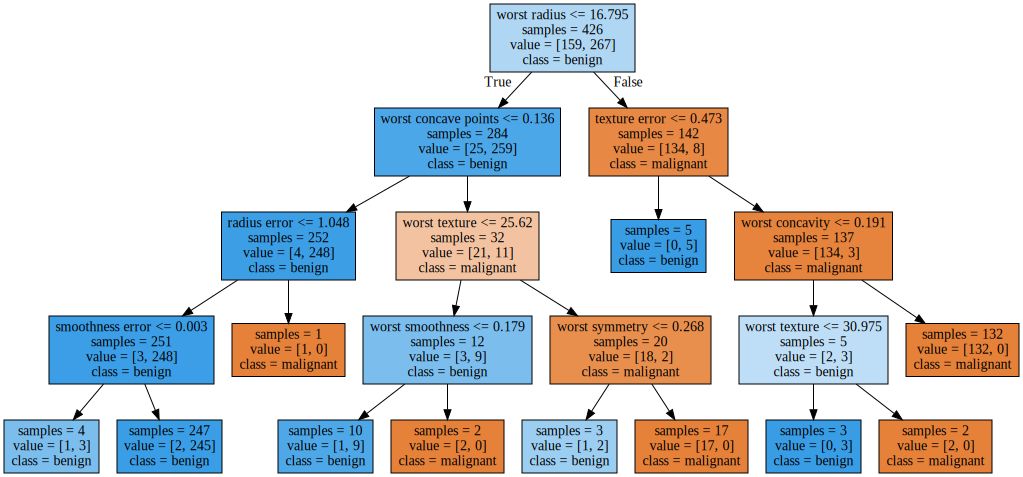

In [44]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [47]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


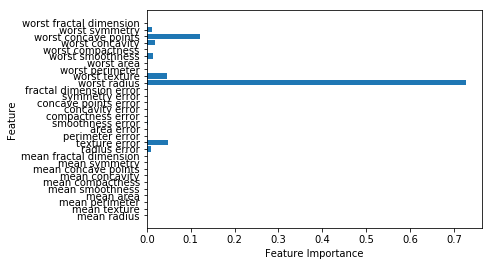

In [50]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


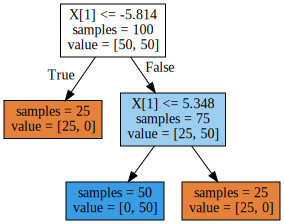

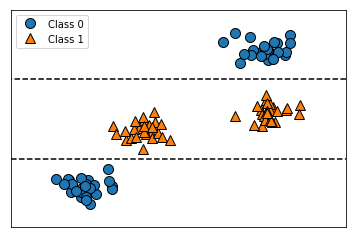

In [51]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)